# Pytorch Lessons

## Import main libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

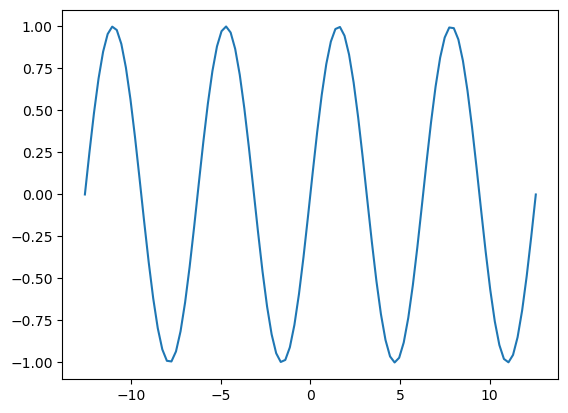

In [5]:
plt.plot(np.linspace(-4*np.pi,4*np.pi,100),np.sin(np.linspace(-4*np.pi,4*np.pi,100)))

In [4]:


import torch
from torch import nn
from torch.utils.data import DataLoader

# from torchvision import datasets
# from torchvision.transforms import ToTensor

from torch.utils.data import Dataset


## Tensors

Creating tensors and some tensor attibutes:

In [ ]:
# Create tensor from numpy array:

X = np.random.normal(0,1,(10,10))
X = torch.tensor(X, dtype=torch.float64)


print('Element of a tensor:')
print(X[0,0])
print('Numpy content')
print(X.numpy())
print('Device')
print(X.device)
print('Shape')
print(X.shape)


Operations on tensors:

In [ ]:

a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)
b = torch.tensor(np.arange(10,19).reshape(3,3), dtype=torch.float64)

print('Sum of two tensors:')
print(a+b)
print('Tensor multiplication:')
print(a @ b)
print('Tensor transpose:')
print((a @ b).T)
print('Tensor multiplication:')
print(torch.matmul(a,b))
print('Mean:')
print(torch.mean(a))


Inline operators have a _ in the end:

In [ ]:
print(a)
a.transpose_(0,1)
print(a)
a.add_(5.0)
print(a)



Numpy and torch

In [ ]:
# In CPU
a = np.arange(1,10).reshape(3,3)
print(a)
t = torch.from_numpy(a)
print(t)
a[0,0] = 4
print(t)

t_ = torch.ones(3,3)

print(t_)

n_ = t_.numpy()

n_[0,0] = 5.0

print(t_)




In [ ]:
if torch.accelerator.is_available():
    tensor = tensor.to(torch.accelerator.current_accelerator())

## Datasets

To implement a custom dataset, we use simulated data.



In [ ]:
num = 10000
ep = 0.1

x = np.random.uniform(-4*np.pi,4*np.pi,(num,2))

y = np.sin(np.sqrt(x[:,0]**2+x[:,1]**2))+ ep*np.random.normal(0,1,num)


np.save('../DATA/x.npy', x)
np.save('../DATA/y.npy', y)


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x_file, y_file):
        # Class constructor:
        # Loads the dataset from files:
        self.x = torch.tensor(np.load(x_file), dtype=torch.float64)
        self.y = torch.tensor(np.load(y_file), dtype=torch.float64)
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        # Retrieves an item from the dataset:
        # In very big daytasets, we should not load all data at once.

        return self.x[index], self.y[index]
        # TODO: convert to tensor 
        
    def __len__(self):
        # Returns the length of the dataset:
        return self.len

In [ ]:
data = CustomDataset('../DATA/x.npy', '../DATA/y.npy')

data.__getitem__(0)

## Dataloaders

In [ ]:
v = np.arange(1,10)

it = iter(v)

print(next(it))
print(next(it))


In [ ]:
train_loader = DataLoader(data, batch_size=64, shuffle=True)

x_batch, y_batch = next(iter(train_loader))

print(x_batch)

print(y_batch)



## Create a sequential NN

In [ ]:
class MyNNTest(nn.Module):

    def __init__(self):
        # call the parent class constructor
        super().__init__()

        # self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [ ]:
# If we wanted to use GPU, we should check if it is available:
# model = NeuralNetwork().to(device)  

# To use double precision:
model = MyNNTest().double()
print(model)

In [ ]:
model(x_batch)

Model parameters

In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Another way to access model params

In [ ]:
model.state_dict()['linear_relu_stack.0.weight']

## Auto diff with torch.autograd

In [ ]:
x = torch.tensor(np.linspace(-4*np.pi,4*np.pi,100), dtype=torch.float64, requires_grad=True)

y = torch.sin(x)

y_sum = torch.sum(y)

y_sum.backward()




In [ ]:

plt.plot(x.detach().numpy(),x.grad.numpy())
plt.plot(x.detach().numpy(),y.detach().numpy())

In [ ]:
import matplotlib
import numpy

print(torch.__version__)
print(numpy.__version__)
print(matplotlib.__version__)